In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm
from scipy import stats 

sys.path.insert(0, '../../Modules')
import erqScaling
import erqMedSpec

#  resampling for LOF score of each bin 

from sklearn.neighbors import LocalOutlierFactor as LOF
cc=-1
from matplotlib import cm
nBoot=100
nBin=8
LOFScoresMedianBins=np.zeros([nBoot,nBin])
opening_angle= np.deg2rad(20)
ERQ_Vector = np.array([1,1])/np.sqrt(2)
#  Obtaining Point A and B for the ERQ wedge
rin=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
rout=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
jj=-1
for k in [40, 50, 100, 150]:
    for s in tqdm(range(nBoot)):

        # Grawing two Gaussian samples
        data=np.random.multivariate_normal([0,0], [[1,0],[0,1]], 30000)

        data_norm = erqMedSpec.vectors_uniter(data)
        clf= LOF(n_neighbors=k,  n_jobs=-1)
        clf.fit_predict(data)
        LOFScores = -clf.negative_outlier_factor_
        theta = np.zeros([len(data)])
        for i in range(len(data)):
            theta[i] = np.arccos(np.dot(ERQ_Vector, data_norm[i,:]))

        # initializing 
        r2 = data[:,0]**2 + data[:,1]**2
        for b in range(nBin):
            if(b==0):
                mask =(r2>=rin[b]**2) & (r2<=rout[b]**2)
            else:
                mask =(r2>=rin[b]**2) & (r2<=rout[b]**2) & (theta<=opening_angle)
            if(np.sum(mask)==0):
                LOFScoresMedianBins[s,b]=np.nan
            else:
                LOFScoresMedianBins[s,b]=np.median(LOFScores[mask])
    np.savetxt('2D-G1-LOFScoresMedianBins1000-k-%d.dat'%k, LOFScoresMedianBins)


100%|██████████| 100/100 [01:45<00:00,  1.05s/it]


(100, 8)
0 1.0011931198002686 1.002946836871579
1 1.0004742443884818 1.0043419903686297
2 1.0010782838869825 1.0051875290699797
3 1.0034699914223044 1.0098714762724237
4 1.012865745673575 1.0304678058305838
5 1.078000583269169 1.1518528616623778
6 1.5451092973993983 2.0850579197146737
7 2.7630840467061897 3.562099226744495


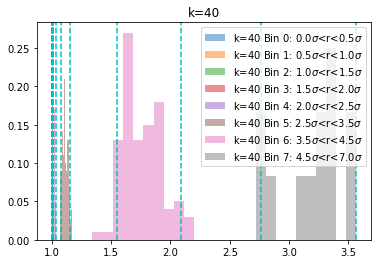

(100, 8)
0 1.0008228120836182 1.0026139540951762
1 0.9998476718768664 1.004340251922432
2 1.000552396396976 1.0042384822844956
3 1.0033610964549873 1.0115601527735527
4 1.0153426990898153 1.03562829294758
5 1.0937578089341666 1.1725254084597245
6 1.5869476815049604 2.1941146147859163
7 2.768241203548027 3.973760617297537


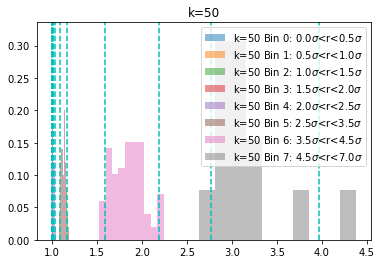

(100, 8)
0 0.9993863946726622 1.0013975711072667
1 0.9987241565887889 1.0031338432542232
2 1.0007111162887412 1.0052957798841502
3 1.0067796063070613 1.0145828244688948
4 1.0306105512931594 1.0620681818957731
5 1.148616571925015 1.2501605566090732
6 1.7640947657828667 2.1678801192908526
7 2.8164622370201453 3.606271786538623


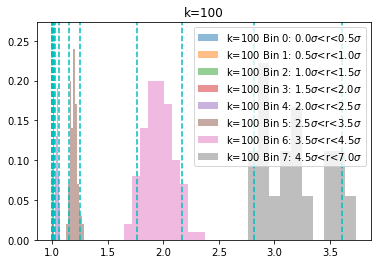

In [2]:
for k in [ 40, 50, 100]:
    LOFScoresMedianBins = np.loadtxt('2D-G1-LOFScoresMedianBins1000-k-%d.dat'%k)
    print(LOFScoresMedianBins.shape)
    P_all =[]
    med_bin=[]
    width= []

    for b in range(nBin):
        N, bins, patch=plt.hist(LOFScoresMedianBins[~np.isnan(LOFScoresMedianBins[:,b]),b], bins=10)
        med_bin.append((bins[:-1] + bins[1:])/2)
        width.append(bins[1] - bins[0])
        P_all.append(N/np.sum(N))
        plt.clf()
        plt.cla()

    for b in range(nBin):
        plt.bar(med_bin[b], P_all[b], width=width[b],  linewidth=0.5, 
                alpha=.5, label=r'k=%d Bin %d: %.1f$\sigma$<r<%.1f$\sigma$'%(k, b, rin[b],rout[b]))
        u= np.percentile(LOFScoresMedianBins[~np.isnan(LOFScoresMedianBins[:,b]),b], 95) 
        l= np.percentile(LOFScoresMedianBins[~np.isnan(LOFScoresMedianBins[:,b]),b], 5) 
        print(b,l,u)
        plt.axvline(x=l, c='c', ls='--')
        plt.axvline(x=u, c='c', ls='--')
    plt.legend()
    plt.title('k=%d'%k)
    plt.savefig('LOF_1G_MOK_PDF-k-%d.png'%k, dpi=200)
    plt.show()

k=40 b=0 l=2.682e-04 m=1.002e+00 u=4.269e-04
k=40 b=1 l=4.040e-04 m=1.002e+00 u=5.724e-04
k=40 b=2 l=4.837e-04 m=1.003e+00 u=8.769e-04
k=40 b=3 l=1.162e-03 m=1.006e+00 u=8.326e-04
k=40 b=4 l=2.038e-03 m=1.020e+00 u=2.839e-03
k=40 b=5 l=9.379e-03 m=1.109e+00 u=1.335e-02
k=40 b=6 l=9.610e-02 m=1.749e+00 u=8.505e-02
k=40 b=7 l=1.081e-01 m=3.253e+00 u=1.011e-01

k=50 b=0 l=2.428e-04 m=1.002e+00 u=3.015e-04
k=50 b=1 l=4.852e-04 m=1.002e+00 u=6.085e-04
k=50 b=2 l=4.621e-04 m=1.003e+00 u=4.378e-04
k=50 b=3 l=1.234e-03 m=1.007e+00 u=1.167e-03
k=50 b=4 l=1.752e-03 m=1.025e+00 u=2.986e-03
k=50 b=5 l=1.725e-02 m=1.133e+00 u=1.139e-02
k=50 b=6 l=9.877e-02 m=1.856e+00 u=8.719e-02
k=50 b=7 l=5.481e-02 m=3.009e+00 u=1.395e-01

k=100 b=0 l=1.552e-04 m=1.000e+00 u=2.825e-04
k=100 b=1 l=6.421e-04 m=1.001e+00 u=5.369e-04
k=100 b=2 l=6.902e-04 m=1.003e+00 u=6.923e-04
k=100 b=3 l=1.438e-03 m=1.011e+00 u=9.842e-04
k=100 b=4 l=5.479e-03 m=1.047e+00 u=3.656e-03
k=100 b=5 l=1.701e-02 m=1.196e+00 u=1.256e-02
k=

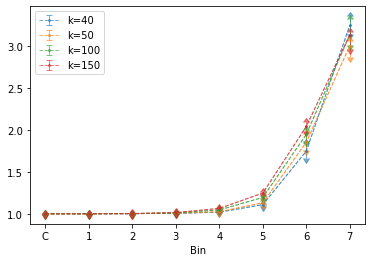

In [3]:
# Plotting 2D Mock LOF error bars 

from scipy import stats 
P_all =[]
med_bin=[]
width= []
c= ['C0', 'C1', 'C2', 'C3', 'C4']
cind=-1
for k in [40, 50, 100, 150]:
    DistLOFMedBin=np.loadtxt('2D-G1-LOFScoresMedianBins1000-k-%d.dat'%k)
    l, u, LOFScoreMedian = np.zeros(nBin),  np.zeros(nBin),  np.zeros(nBin)
    for b in range(nBin):
        
        l[b]= np.percentile(DistLOFMedBin[~np.isnan(DistLOFMedBin[:,b]),b],32)
        u[b]= np.percentile(DistLOFMedBin[~np.isnan(DistLOFMedBin[:,b]),b],68)
        LOFScoreMedian[b] = np.nanmedian(DistLOFMedBin[:,b])       
        u[b]=u[b] - LOFScoreMedian[b]
        l[b]=LOFScoreMedian[b] - l[b]
        print('k=%d b=%d l=%.3e m=%.3e u=%.3e'%(k, b, l[b],LOFScoreMedian[b],u[b]))
    print('')
    cind+=1
    plt.errorbar(['C', '1', '2', '3', '4', '5', '6','7'], LOFScoreMedian, 
                 yerr=l, uplims=False, lolims=True, marker='o', lw=1, ls='--',
             markersize=2, alpha =0.6, label='k=%d'%k, c=c[cind])
    plt.errorbar(['C', '1', '2', '3', '4', '5', '6','7'], LOFScoreMedian, 
                 yerr=u, uplims=True, lolims=False, marker='o', lw=1, ls='--',
             markersize=1, alpha =0.6, c=c[cind])
plt.xlabel('Bin')
plt.legend()
plt.savefig('LOF_MOK_2D-G1-errorbar.png', dpi=200, bbox_inches='tight')
plt.show()


In [4]:
! cp  LOF_MOK_2D-G1-errorbar.png ../../../erqPaper/fig